#  Weather Prediction Using Supervised learning:
 we explore the application of ML to weather prediction. Specifically, we focus on the use of supervised learning algorithms, including decision trees, logistic regression, and k-nearest neighbors, to predict weather conditions based on historical data. We use a dataset containing daily weather measurements from multiple weather stations in a
 particular region and train our ML models on this data to predict future weather conditions.

 We will use the "seattle-weather.csv" dataset from Kaggle to analyze and build predictive models of weather conditions based on accompanying conditions. This is a set of weather data in the US state of Seattle recorded on a daily basis for about 4 years, includes weather conditions such as observed date, high and low temperature, precipitation, speed wind and weather conditions of the day associated with those conditions.

Models used: Logistic Regression, Decision Tree, K-Nearest Neighbor Classifier (KNN).

# **Import Library**
imports necessary libraries such as numpy, pandas, seaborn, etc. for data manipulation, visualization, statistical analysis, and machine learning.

In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import scipy
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, ttest_ind
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# **Understanding the dataset**

In [ ]:
# Load the CSV file into a DataFrame
data = pd.read_csv("dataset.csv")

# Display the first five rows of the DataFrame
print(data.head())

         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain


There are 6 variables corresponding to 6 columns in the dataset:

1 variable to record date information: date has the form YYYY-MM-DD

1 variable indicating weather condition: weather

The variable precipitation indicates the precipitation information of all forms of water falling to the ground such as rain, hail, snowfall or drizzle.

The temp_max variable indicates the highest temperature of the day.

The temp_min variable indicates the lowest temperature of the day.

The wind variable stores wind speed information for the day.

The weather defines the weather of the day

In [ ]:
#print the diamension
data.shape

(1461, 6)

In [ ]:
#print information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


# **Data Visualization**
In this step , we just anayais the data.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Label Encoding
le = LabelEncoder()
## Fit the encoder to the weather column and transform the values
data['weather_encoder'] = le.fit_transform(data['weather'])
# Create a dictionary that maps the encoded values to the actual names
weather_names = dict(zip(le.classes_, le.transform(le.classes_)))
# Print the weather_names dictionary
print(weather_names)

{'drizzle': 0, 'fog': 1, 'rain': 2, 'snow': 3, 'sun': 4}


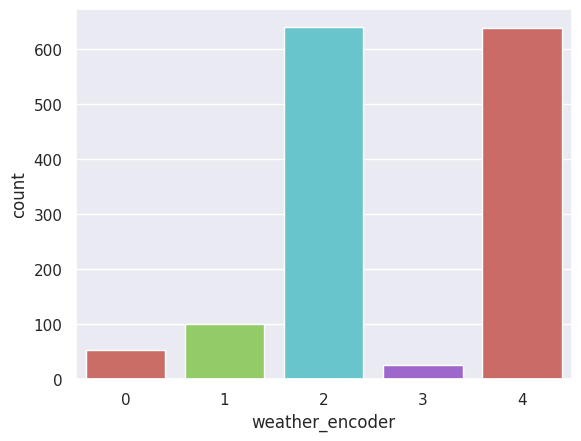

In [ ]:
# Plot the count of each unique value in the weather column with actual names on the labels
sns.countplot(x='weather_encoder', data=data, hue='weather_encoder', palette='hls', legend=False)

# Set the actual weather names as tick labels
plt.xticks(ticks=range(len(weather_names)), labels=list(weather_names.values()))

# Show the plot
plt.show()

In [ ]:
# Get the value counts of each unique value in the weather column
weather_counts = data['weather'].value_counts()

# Print the percentage of each unique value in the weather column
for weather, count in weather_counts.items():
    percent = (count / len(data)) * 100
    print(f"Percent of {weather.capitalize()}: {percent:.2f}%")

Percent of Rain: 43.87%
Percent of Sun: 43.81%
Percent of Fog: 6.91%
Percent of Drizzle: 3.63%
Percent of Snow: 1.78%


From the above graph and analysis, we can see that our dataset contains mostly rain and sun weather conditions.
Remark: Since there is little data about snow, fog and drizzle, this can affect the accuracy of the model when predicting snow, fog and drizzle weather conditions. when too little data to train.

Next, we will learn about the variables that play the role of weather conditions in the dataset, including: precipitation, temp_max, temp_min, wind

In [ ]:
data[['precipitation','temp_max','temp_min','wind']].describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


Now, we will view the distribution using histogram

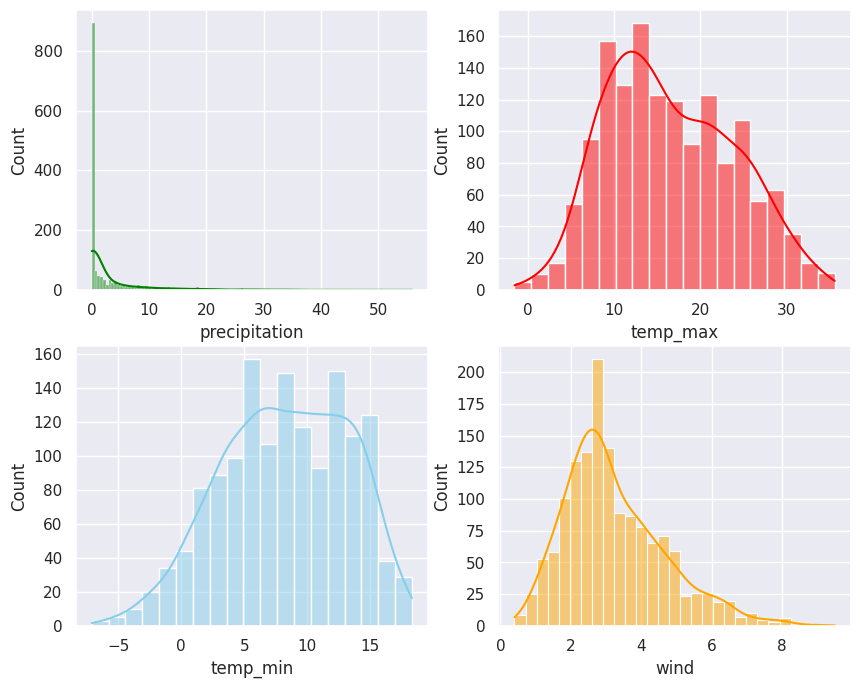

In [ ]:
sns.set(style="darkgrid")

# Define the variables and colors for the subplots
variables = ["precipitation", "temp_max", "temp_min", "wind"]
colors = ["green", "red", "skyblue", "orange"]

# Create the subplots using a loop
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
for i, var in enumerate(variables):
    sns.histplot(data=data, x=var, kde=True, ax=axs[i//2, i%2], color=colors[i])

From the graphs above, it is clear that the distribution of precipitation, wind and has positively skewed (right skewed). The right tail is longer than the left tail.
The distribution of temp_min has negative skewness (left skewed)
And both have some outliers.

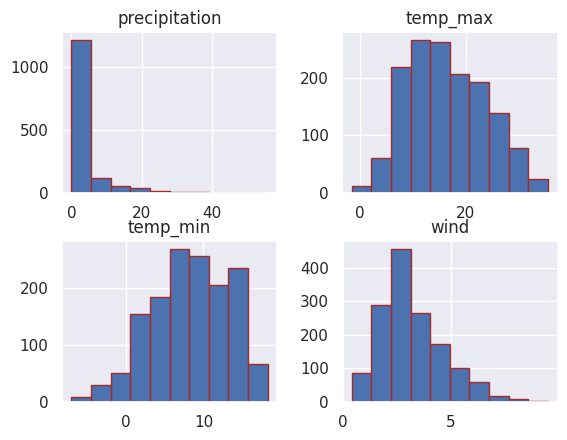

In [ ]:
#The histogram which shows the distribution
data[["precipitation", "temp_max", "temp_min", "wind"]].hist(edgecolor = "brown") # Use a list of column names within square brackets
plt.show()

**co-relation matrix (calculate the relationship between each column in your dataset)**

The error message "ValueError: could not convert string to float: '2012-01-01'" indicates that the data.corr() function is encountering a column containing date strings (likely the 'date' column in your DataFrame) which it cannot automatically convert to a numerical type for correlation calculation.
so we will not use:
correlation = data.corr()
After droping the column date we will do that

In [ ]:
correlation = data.drop(columns=['date']).corr(numeric_only=True) # Drop the 'date' column before calculating correlation
correlation

,precipitation,temp_max,temp_min,wind,weather_encoder
precipitation,1.000000,-0.228555,-0.072684,0.328045,-0.267388
temp_max,-0.228555,1.000000,0.875687,-0.164857,0.322337
temp_min,-0.072684,0.875687,1.000000,-0.074185,0.154981
wind,0.328045,-0.164857,-0.074185,1.000000,-0.065858
weather_encoder,-0.267388,0.322337,0.154981,-0.065858,1.000000


## **Heatmap**
plot heatmap to understand the relationship between the columns

<Axes: >

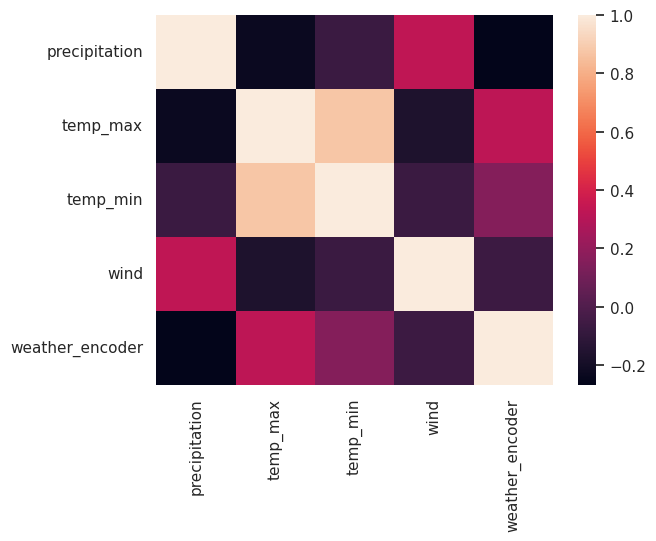

In [ ]:
sns.heatmap(correlation)

## **HANDLING NULL VALUES**

In [ ]:
data.isnull().sum()

,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0
weather_encoder,0


By looking above details, we can conclude that there are no NULL values ​​in the condition variables because the columns all have 1461 observations that are exactly the same as the number of rows of the data.

### **DATA PROCESSING AND CLEANING:**
The first assumption here is that in this data set, the variable date is an unnecessary data variable that does not need to be used, does not affect the results in the process of building our predictive models. we. So in the first case, we will proceed to remove this variable from the dataset.

In [ ]:
# Drop the "date" column from the dataframe
df = data.drop("date", axis=1)

# Display the first 5 rows of the resulting dataframe
df.head()

,precipitation,temp_max,temp_min,wind,weather,weather_encoder
0,0.0,12.8,5.0,4.7,drizzle,0
1,10.9,10.6,2.8,4.5,rain,2
2,0.8,11.7,7.2,2.3,rain,2
3,20.3,12.2,5.6,4.7,rain,2
4,1.3,8.9,2.8,6.1,rain,2


In [ ]:
#we no longer need weather column
if "weather" in df.columns:
    df = df.drop("weather", axis=1)


x = ((df.loc[:,df.columns!="weather_encoder"]).astype(int)).values[:,0:]
y = df["weather_encoder"].values

In [ ]:
df.weather_encoder.unique()

array([0, 2, 4, 3, 1])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

# **Model Training**

The first assumption here is that in this data set, the variable date is an unnecessary data variable that does not need to be used, does not affect the results in the process of building our predictive models. we. So in the first case, we will proceed to remove this variable from the dataset. After that we are spliting the data set into testing data and training data.

### **K-Nearest Neighbor Classifier**

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Initialize the K-Nearest Neighbors classifier
knb = KNeighborsClassifier(n_neighbors=2)
# Fit the model on the training data
knb.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
prediction = knb.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 67.35%


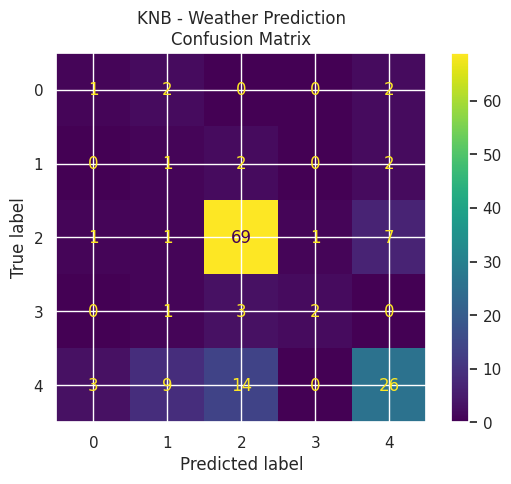

In [ ]:
### Plot the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def confmatrix(y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    disp.ax_.set_title(title)
    plt.show()
confmatrix(prediction, "KNB - Weather Prediction\nConfusion Matrix")

### **Gaussian Naive**

In [ ]:
### Instantiate the Algorithm
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
### Train the model
gnb.fit(x_train, y_train)

GaussianNB()

In [ ]:
prediction = knb.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 67.35%


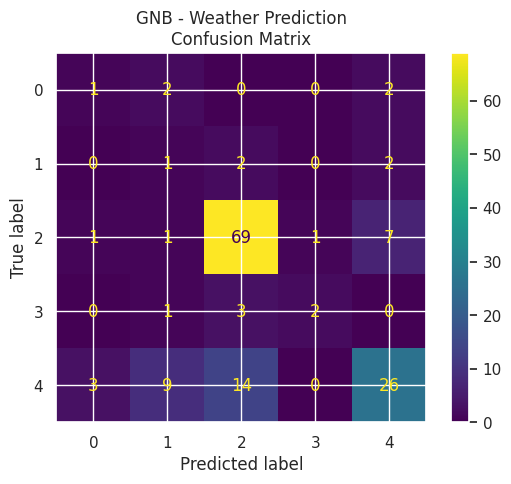

In [ ]:
### Plot the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def confmatrix(y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    disp.ax_.set_title(title)
    plt.show()
confmatrix(prediction, "GNB - Weather Prediction\nConfusion Matrix")

### **Decision Tree:**

In [ ]:
#decison tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
prediction = dtc.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 70.07%


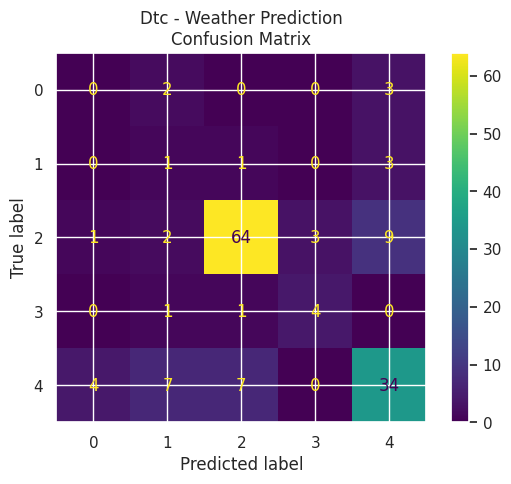

In [ ]:
### Plot the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def confmatrix(y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    disp.ax_.set_title(title)
    plt.show()
confmatrix(prediction, "Dtc - Weather Prediction\nConfusion Matrix")

### **Random Forest:**

In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
prediction = rfc.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 74.83%


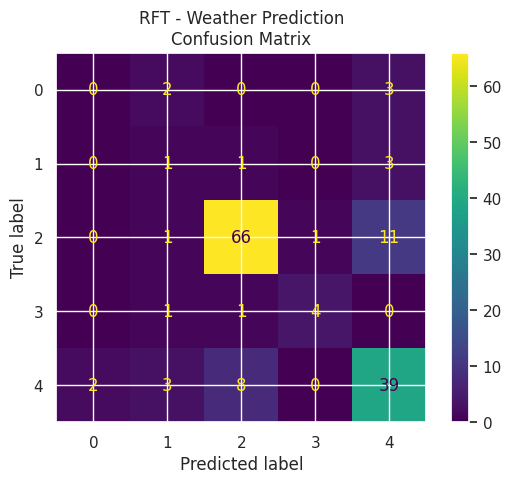

In [ ]:
### Plot the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def confmatrix(y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    disp.ax_.set_title(title)
    plt.show()
confmatrix(prediction, "RFT - Weather Prediction\nConfusion Matrix")

### **Logistic Regression**

In [ ]:
#logictic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
prediction = lr.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 80.95%


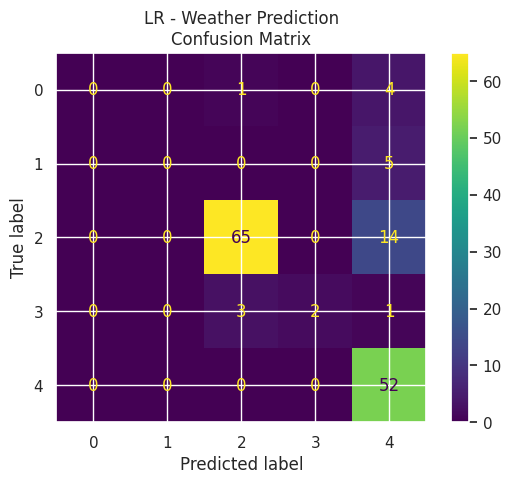

In [ ]:
### Plot the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def confmatrix(y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    disp.ax_.set_title(title)
    plt.show()
confmatrix(prediction, "LR - Weather Prediction\nConfusion Matrix")

### **SVM Classifier:**

In [ ]:
#SVM classifer
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)


SVC()

In [ ]:
prediction= svc.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 77.55%


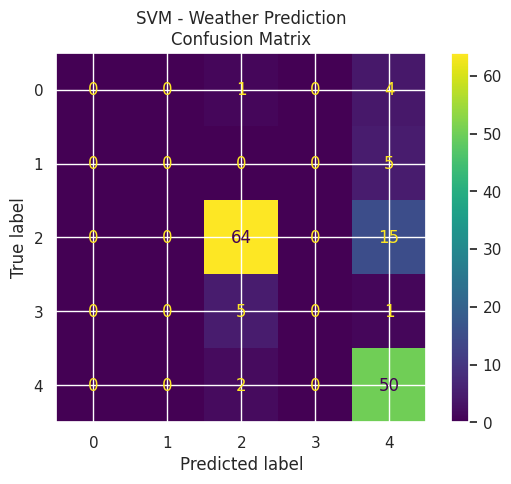

In [ ]:
### Plot the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def confmatrix(y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    disp.ax_.set_title(title)
    plt.show()
confmatrix(prediction, "SVM - Weather Prediction\nConfusion Matrix")

### **Model Testing**
Here, we will use a typical model from the number of models built above to test the results. We will choose a model built with Decision Tree with variable month that stores month information extracted from date variable, with parameter max_depth = 4. This model has an accuracy of 0.809.

In [ ]:
# Create a decision tree classifier with the current max depth value and other parameters
dec_df3 = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=15, random_state=0)

# Train the decision tree model on the training data
dec_df3.fit(x_train, y_train)

# Compute the accuracy of the decision tree model on the testing data
dec_score_df3 = dec_df3.score(x_test, y_test)

# Print the accuracy score to the console
print("Decision Tree Accuracy: ", dec_score_df3)

Decision Tree Accuracy:  0.8095238095238095


In [ ]:
for i in (range(len(y_test))):
    print("----------------------------------")
    ot = dec_df3.predict([x_test[i]])
    if(ot==0):
        print("The weather predict is: Drizzle")
    elif(ot==1):
        print("The weather predict is: Fog")
    elif(ot==2):
        print("The weather predict is: Rain")
    elif(ot==3):
        print("The weather predict is: Snow")
    else:
        print("The weather predict is: Sun")
    ac = y_test[i]
    if(ac==0):
        print("The weather actual is: Drizzle")
    elif(ac==1):
        print("The weather actual is: Fog")
    elif(ac==2):
        print("The weather actual is: Rain")
    elif(ac==3):
        print("The weather actual is: Snow")
    else:
        print("The weather actual is: Sun")

----------------------------------
The weather predict is: Rain
The weather actual is: Rain
----------------------------------
The weather predict is: Snow
The weather actual is: Snow
----------------------------------
The weather predict is: Sun
The weather actual is: Sun
----------------------------------
The weather predict is: Sun
The weather actual is: Sun
----------------------------------
The weather predict is: Rain
The weather actual is: Rain
----------------------------------
The weather predict is: Rain
The weather actual is: Rain
----------------------------------
The weather predict is: Sun
The weather actual is: Sun
----------------------------------
The weather predict is: Sun
The weather actual is: Rain
----------------------------------
The weather predict is: Sun
The weather actual is: Sun
----------------------------------
The weather predict is: Rain
The weather actual is: Rain
----------------------------------
The weather predict is: Sun
The weather actual is: Sun